In [1]:
using SymPy
using LinearAlgebra

@vars t x y z  real=true

X=[t,x,y,z];

#  Levi-Civita记号
ε= [ Sym((length(Set([i,j,k]))==3)*       #  存在重复指标，取0
    (-1)^(sum([i,j,k][σ]>[i,j,k][ρ]   
            for σ in 1:3,ρ in  1:3  if σ<ρ) % 2)) # 计算逆序数。偶数取1，奇数取-1
    for  i in 1:3, j in 1:3, k in 1:3 ] ;

# 单位矩阵
δ = sympy.diag(1,1,1);

#  四维evi-Civita记号
ε4= [ Sym((length(Set([i,j,k,l]))==4)*       #  存在重复指标，取0
    (-1)^(sum([i,j,k,l][σ]>[i,j,k,l][ρ]   
            for σ in 1:4,ρ in  1:4  if σ<ρ) % 2)) # 计算逆序数。偶数取1，奇数取-1
    for  i in 1:4, j in 1:4, k in 1:4,l in 1:4 ] ;

# 闵氏度规
η = sympy.diag(-1,1,1,1);

In [2]:
P=IM*sympy.diag(1,1,1,1)

4×4 Array{Sym,2}:
 I  0  0  0
 0  I  0  0
 0  0  I  0
 0  0  0  I

In [3]:
J=IM*[0 0 z -y; 0 -z 0 x; 0 y -x 0]

3×4 Array{Sym,2}:
 0     0   I*z  -I*y
 0  -I*z     0   I*x
 0   I*y  -I*x     0

In [4]:
K=IM*[x t 0 0; y 0 t 0;  z 0 0 t]

3×4 Array{Sym,2}:
 I*x  I*t    0    0
 I*y    0  I*t    0
 I*z    0    0  I*t

In [5]:
JJ = [Sym(0) for μ in 1:4,  υ in 1:4 ,ρ in 1:4];
JJ[2:4,2:4,1:4]=[sum(ε[k,i,j]*J[k,l] for k in 1:3) for i in 1:3,j in 1:3, l in 1:4];
JJ[1,2:4,1:4] = K;
JJ[2:4,1,1:4] = -K;
[[JJ[μ,υ,σ] for σ in 1:4] for μ in 1:4, υ in 1:4]

4×4 Array{Array{Sym,1},2}:
 [0, 0, 0, 0]        [I*x, I*t, 0, 0]   [I*y, 0, I*t, 0]   [I*z, 0, 0, I*t]
 [-I*x, -I*t, 0, 0]  [0, 0, 0, 0]       [0, I*y, -I*x, 0]  [0, I*z, 0, -I*x]
 [-I*y, 0, -I*t, 0]  [0, -I*y, I*x, 0]  [0, 0, 0, 0]       [0, 0, I*z, -I*y]
 [-I*z, 0, 0, -I*t]  [0, -I*z, 0, I*x]  [0, 0, -I*z, I*y]  [0, 0, 0, 0]

In [6]:
J=(1//2)*[sum(ε[i,j,k]*JJ[j+1,k+1,l] for j in 1:3, k in 1:3) for i in 1:3, l in 1:4 ]

3×4 Array{Sym,2}:
 0     0   I*z  -I*y
 0  -I*z     0   I*x
 0   I*y  -I*x     0

In [7]:
K=JJ[1,2:4,1:4]

3×4 Array{Sym,2}:
 I*x  I*t    0    0
 I*y    0  I*t    0
 I*z    0    0  I*t

In [8]:
[sum(P[μ,ρ]*diff(P[υ,σ],X[ρ])-P[υ,ρ]*diff(P[μ,σ],X[ρ])  for ρ in 1:4) 
        for μ in 1:4, υ in 1:4, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [9]:
[sum(J[μ,ρ]*diff(J[υ,σ],X[ρ])-J[υ,ρ]*diff(J[μ,σ],X[ρ])  for ρ in 1:4) -
    IM* sum(ε[μ,υ,ρ]*J[ρ,σ] for ρ in 1:3)
        for μ in 1:3, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [10]:
[sum(K[μ,ρ]*diff(K[υ,σ],X[ρ])-K[υ,ρ]*diff(K[μ,σ],X[ρ])  for ρ in 1:4) +
    IM* sum(ε[μ,υ,ρ]*J[ρ,σ] for ρ in 1:3)
        for μ in 1:3, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [11]:
[sum(P[μ,ρ]*diff(J[υ,σ],X[ρ])-J[υ,ρ]*diff(P[μ,σ],X[ρ])  for ρ in 1:4)
        for μ in 1:1, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [12]:
[sum(P[μ+1,ρ]*diff(J[υ,σ],X[ρ])-J[υ,ρ]*diff(P[μ+1,σ],X[ρ])  for ρ in 1:4) -
    IM* sum(ε[μ,υ,ρ]*P[ρ+1,σ] for ρ in 1:3)
        for μ in 1:3, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [13]:
[sum(P[μ,ρ]*diff(K[υ,σ],X[ρ])-K[υ,ρ]*diff(P[μ,σ],X[ρ])  for ρ in 1:4) -
    IM*P[υ+1,σ]
        for μ in 1:1, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [14]:
[sum(P[μ+1,ρ]*diff(K[υ,σ],X[ρ])-K[υ,ρ]*diff(P[μ+1,σ],X[ρ])  for ρ in 1:4) -
    IM* δ[μ,υ]* P[1,σ]
        for μ in 1:3, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [15]:
[sum(J[μ,ρ]*diff(K[υ,σ],X[ρ])-K[υ,ρ]*diff(J[μ,σ],X[ρ])  for ρ in 1:4) -
    IM* sum(ε[μ,υ,ρ]*K[ρ,σ] for ρ in 1:3)
        for μ in 1:3, υ in 1:3, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [16]:
[sum(JJ[μ,υ,τ]*diff(P[ρ,σ],X[τ])-P[ρ,τ]*diff(JJ[μ,υ,σ],X[τ])  for τ in 1:4) -
    IM*(η[μ,ρ]*P[υ,σ]-η[υ,ρ]*P[μ,σ])
        for μ in 1:4, υ in 1:4, ρ in 1:4, σ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [17]:
[sum(JJ[μ,υ,ι]*diff(JJ[ρ,σ,τ],X[ι])-JJ[ρ,σ,ι]*diff(JJ[μ,υ,τ],X[ι])  for ι in 1:4) -
    IM*(η[μ,ρ]*JJ[υ,σ,τ]-η[μ,σ]*JJ[υ,ρ,τ]-η[υ,ρ]*JJ[μ,σ,τ]+η[υ,σ]*JJ[μ,ρ,τ])
        for μ in 1:4, υ in 1:4, ρ in 1:4, σ in 1:4, τ in 1:4] |> 
(expr->all(e->(e==0),expr))  # 全零判断

true

In [18]:
[sum(η[μ,υ]*P[μ,σ]*diff(P[υ,ρ],X[σ]) for μ in 1:4, υ in 1:4, σ in 1:4) for ρ in 1:4]

4-element Array{Sym,1}:
 0
 0
 0
 0

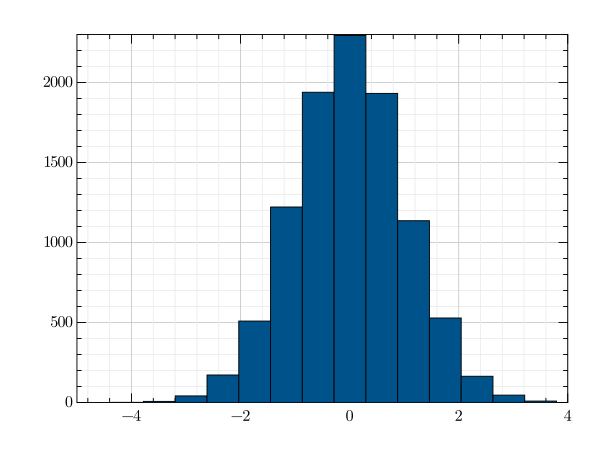

In [19]:
using GR
histogram(randn(10000))